#### Imports

In [1]:

#Preprocesado de datos / carga de datos
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluación del modelo
from tensorflow.keras.models import load_model

#### Data

In [2]:
base_dir = "data"
train_dir = os.path.join(base_dir, 'train-cat-rabbit')
test_dir = os.path.join(base_dir, 'test-images')
valid_dir = os.path.join(base_dir, 'val-cat-rabbit')

#### Técnicas de Escalamiento y Preprocesado

In [3]:
train_datagen = ImageDataGenerator(
#Técnicas de preprocesamiento de datos para mejorar la categorización del modelo
				rescale = 1./255, 
				rotation_range = 40, 
				width_shift_range = 0.2, 
    			height_shift_range=0.2,
				zoom_range = 0.1,
				horizontal_flip = True,
				brightness_range=[0.5, 1],
    			fill_mode='nearest'
    )


#Técnicas de preprocesamiento de datos para mejorar la categorización del modelo

test_datagen = ImageDataGenerator(rescale = 1./255)       
# Escala los píxeles de las imágenes de prueba al rango [0, 1]
validation_datagen = ImageDataGenerator(rescale=1./255)


Found 1811 images belonging to 2 classes.
Found 426 images belonging to 2 classes.
Found 414 images belonging to 2 classes.


<Figure size 640x480 with 0 Axes>

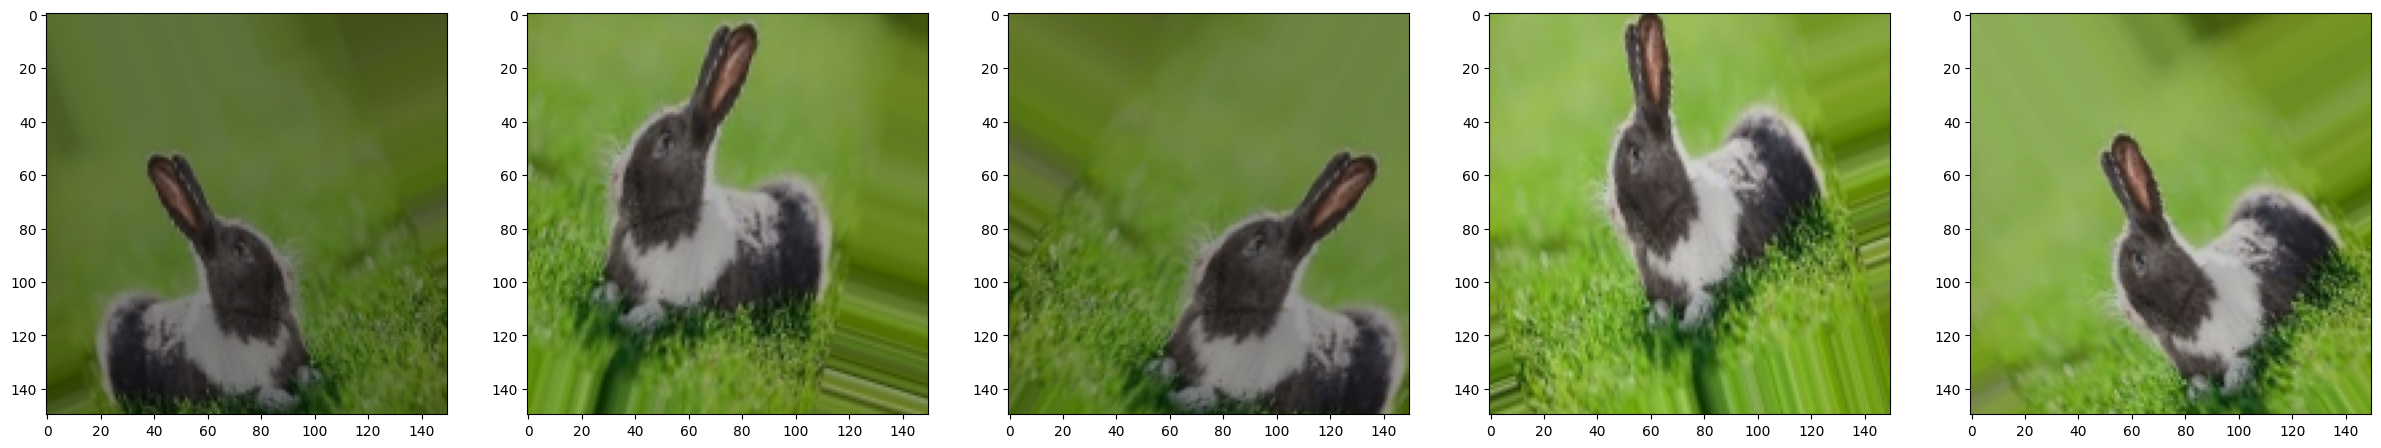

In [4]:

images_size = (150, 150) #Medida de las imágenes

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = images_size, # Tamaño al que se redimensionan las imágenes
							batch_size = 32,  # Tamaño del lote de imágenes por batch
							class_mode ='binary', # Tipo de etiquetas: 'binary' porque hay dos clases (gato y conejo)
       						shuffle = True 
							)


test_generator = test_datagen.flow_from_directory(
							test_dir,
							target_size = images_size,
							batch_size = 32,  
							class_mode ='binary',
       						shuffle = False		
   							)


validation_generator = validation_datagen.flow_from_directory(
							valid_dir,
							target_size = images_size, 
							batch_size = 32, 
							class_mode ='binary', 
							shuffle = False
							)


plt.figure()
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  	axarr[i].imshow(train_generator[0][0][0])

(32, 150, 150, 3)
[1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 1.]


<Figure size 640x480 with 0 Axes>

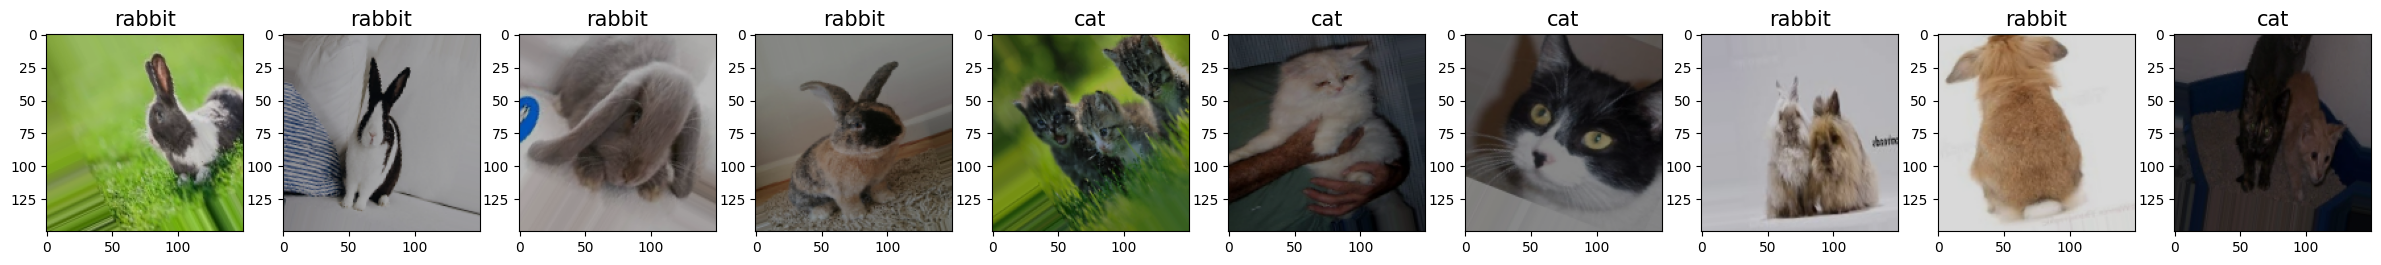

In [5]:
# Visualizar imágenes y las etiquetas despúes de escalamiento y preprocesado
images, labels = train_generator[0]
class_names = list(train_generator.class_indices.keys())

print(images.shape)
print(labels)

plt.figure()
f, axarr = plt.subplots(1, 10, figsize=(30, 7))

for i in range(10):
    axarr[i].imshow(images[i])
    axarr[i].set_title(class_names[int(labels[i])], fontsize=15)


#### Modelo

In [6]:
# Crear el modelo CNN

model = Sequential([
    # Capa 1: Convolucional con 32 filtros de 3x3, función de activación ReLU, y tamaño de entrada 150x150x3 
    # Capa de MaxPooling para redicir las dimensiones de la salida
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    

    # Capa 2: Convolucional con 64 filtros de 3x3, función de activación ReLU 
    # Capa de MaxPooling para redicir las dimensiones de la salida    
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    
    #Capa 3: Convolucional con 128 filtros de 3x3, función de activación ReLU
    #Capa de MaxPooling para redicir las dimensiones de la salida
    
    Conv2D(128, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    
    
    #Aplanar la salida para pasarla a capas más densas
    Flatten(),
    
    #Poner en 0 de forma aleatoria un porcentaje de neuronas durante cada paso de entrenamiento

    Dropout(0.3),
    
    #Capa densa con 512 neuronas y función de activación ReLU
    #Capa de salida con una neurona de activación sigmoide para clasificar los gatos y conejos
    Dense(128, activation= "relu"),
    Dense(1, activation='sigmoid') 
])

# Compilar el modelo con optimizador Adam, pérdida binaria y métrica de precisión


#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
# Mostrar resumen de la arquitectura del modelo
model.summary()

C:\Users\casas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    verbose=1
)

C:\Users\casas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 304ms/step - accuracy: 0.4950 - loss: 0.7027 - val_accuracy: 0.5048 - val_loss: 0.6861
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 298ms/step - accuracy: 0.5802 - loss: 0.6824 - val_accuracy: 0.6449 - val_loss: 0.6372
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 297ms/step - accuracy: 0.6037 - loss: 0.6676 - val_accuracy: 0.6715 - val_loss: 0.6331
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 309ms/step - accuracy: 0.6240 - loss: 0.6516 - val_accuracy: 0.6932 - val_loss: 0.6237
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 313ms/step - accuracy: 0.5954 - loss: 0.6570 - val_accuracy: 0.6353 - val_loss: 0.6662
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 301ms/step - accuracy: 0.6042 - loss: 0.6559 - val_accuracy: 0.6087 - val_loss: 0.6521
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 300ms/step - accuracy: 0.6375 - loss: 0.6404 - val_accuracy: 0.6329 - val_loss: 0.6130
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 301ms/step - accuracy: 0.6605 - loss: 0.6246 - val_accu

In [8]:
# history = model.fit(
#         train_generator,              # Conjunto de entrenamiento con data-augmentation
#         epochs=20,                    
#         validation_data = validation_generator,   # Conjunto de validación para monitoreo
#         verbose=1                     # Muestra el progreso en pantalla
# )


In [9]:
# Guardar el modelo 
model.save('segundo_modelo.h5')

#### Evaluar el modelo

In [10]:
model = load_model('segundo_modelo.h5')

In [11]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.6920 - loss: 0.6019
Test accuracy: 0.7488


In [12]:
# Obtener predicciones
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

# Etiquetas verdaderas
y_true = test_generator.classes
# Nombres de clases
class_labels = list(test_generator.class_indices.keys())

# Reporte de métricas
print("Reporte:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Reporte:

              precision    recall  f1-score   support

         cat       0.84      0.65      0.73       223
      rabbit       0.69      0.86      0.77       203

    accuracy                           0.75       426
   macro avg       0.76      0.75      0.75       426
weighted avg       0.77      0.75      0.75       426



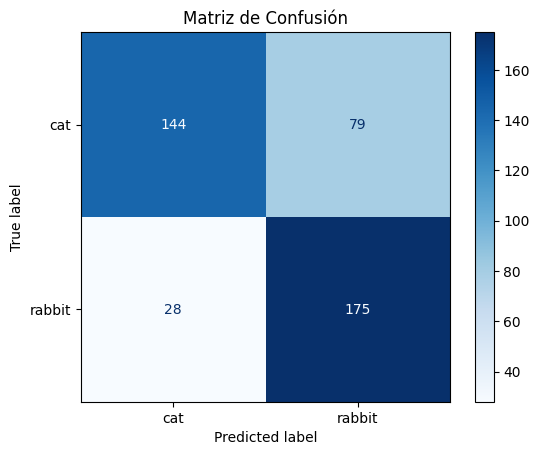

In [13]:
# Generar matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Mostrar matriz de confusión 
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_generator.class_indices.keys()))
cm_display.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

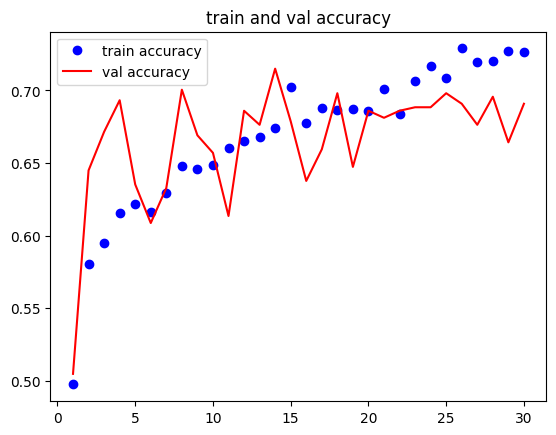

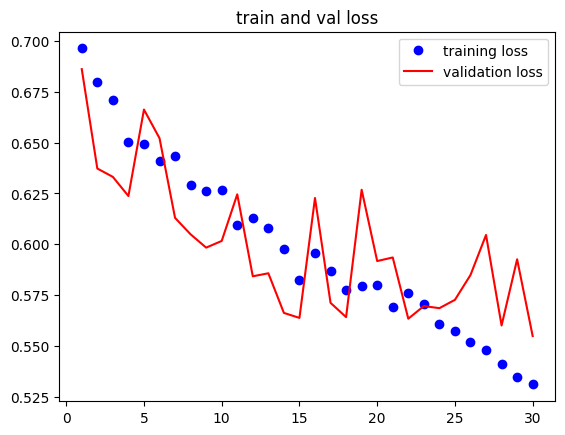

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# Accuracy

plt.figure()
plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc,'r',label='val accuracy')
plt.title('train and val accuracy')
plt.legend()
plt.show()

# Loss
plt.figure()
plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs, val_loss, 'r', label ='validation loss')
plt.title('train and val loss')
plt.legend()

plt.show()